## Introduction to Statistical Learning Chapter 3 Excercise 9
### This question involves the use of multiple linear regression on the Auto data set.

### 1. Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from math import sqrt
from scipy import stats

import matplotlib.pyplot as plt
import statsmodels.api as sm

### 2. Data processing and cleaning

In [6]:
data = pd.read_csv('Auto.csv')
data['horsepower'] = data['horsepower'].replace('?',np.nan)
data = data.dropna()
data['horsepower'] = data['horsepower'].astype('float')
X = data[['cylinders','displacement','horsepower','weight','acceleration','year','origin']]
y = data[['mpg']]

### 3. Questions

### (a) Produce a scatterplot matrix which includes all of the variables in the data set.

<Figure size 648x648 with 0 Axes>

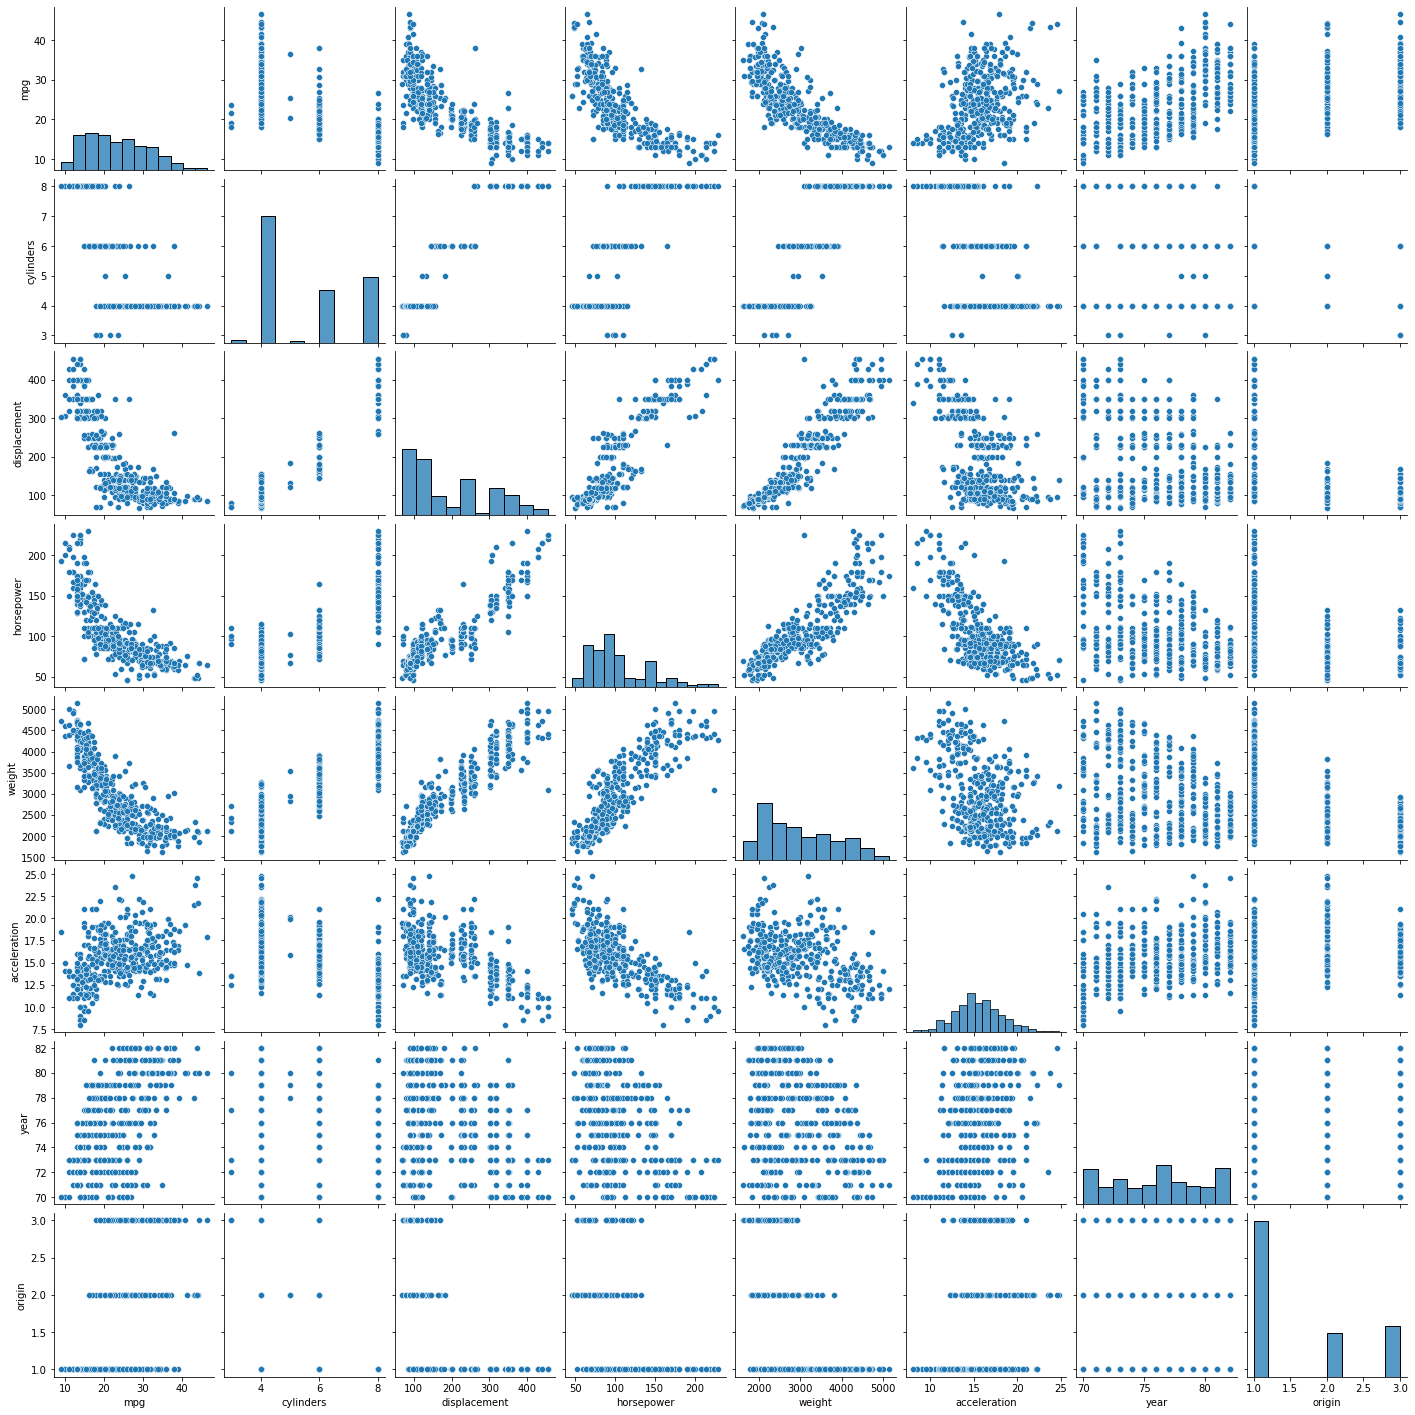

In [4]:
plt.figure(figsize = (9,9))
sns.pairplot(data);

### (b) Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.

<AxesSubplot:>

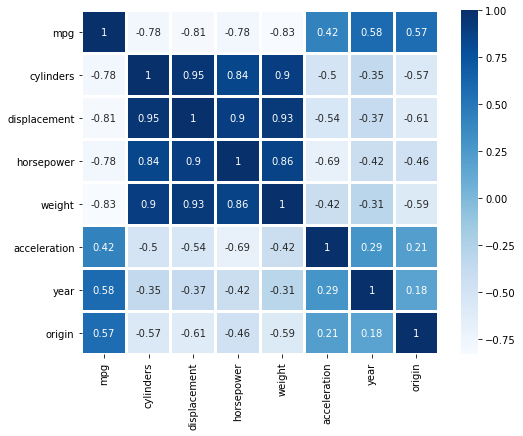

In [14]:
plt.figure(figsize = (8,6.33))
X = data[['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin']]
sns.heatmap(X.corr(), annot=True, cmap="Blues",linewidths=2)

### (c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results.                                                      Comment on the output. For instance:

### i. Is there a relationship between the predictors and the response?

The p value for the F-statistic returned by the summary function is much lesser than 0.05, assuming test at significance level of 0.05, hence we reject the null hypothesis that all coefficients for the predictors are 0, and accept the alternate hypothesis that at least some of the predictors can be used to account for the variation in the target variable Y (miles per gallon).

### ii. Which predictors appear to have a statistically significant relationship to the response?

The predictors that are statistically significant are displacement,weight, year and origin.


#### iii. What does the coefficient for the year variable suggest?

The coefficient for year is 0.7508, it suggests that Y (miles per gallon) is expected to change by 0.7508 for every unit change in year, with all other predictors fixed.



In [8]:
X = data[['cylinders','displacement','horsepower','weight','acceleration','year','origin']]
y = data[['mpg']]
X = sm.add_constant(X)
X.rename(columns={'const':'Intercept'},inplace = True)
lin_reg = sm.OLS(y,X).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 01 Mar 2021   Prob (F-statistic):          2.04e-139
Time:                        11:43:11   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

### (d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

From the studentized vs fitted values plot, the plot appears to have a "fanning" effect , that residuals are more fanned out at predicted values that are large, this suggests that our features selected in the linear regression model do not fully explain the response variable.

From the residual plot alone, it is difficult to determine at which threshold (beyond 3 standard deviation or 4 standard deviation from the regression line) to set for the studentized residual for a datapoint to be considered an outlier.
If we consider 4 standard deviation away for our plot, there is one outlier in our dataset.



####  Acknowledgement for the functions lm_stats and lm_plot to generate the plots for residual diagnostics.
     The functions were adapted for use from Github user: https://github.com/a-martyn
     Source: https://github.com/a-martyn/ISL-python/blob/master/Notebooks/ch3_linear_regression_applied.ipynb

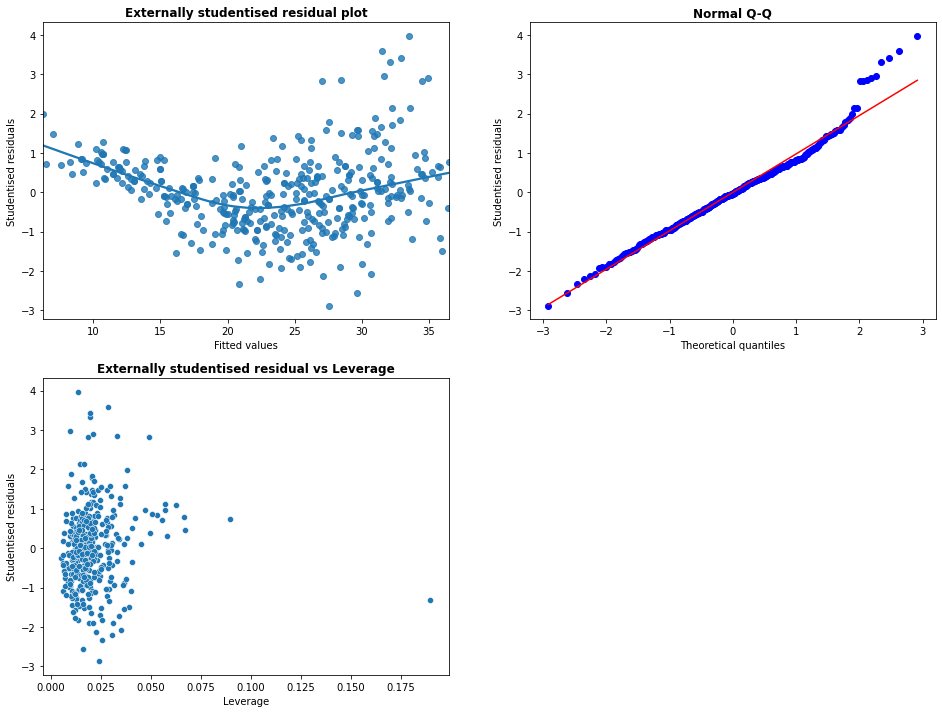

In [11]:
def lm_stats(X, y, y_pred):
    X = np.array(X)
    # Residuals
    residuals = np.array(y - y_pred)
    # Hat matrix
    H = np.array(X @ np.linalg.inv(X.T @ X)) @ X.T
    # Leverage
    h_ii = H.diagonal().reshape(-1,1)
    # Estimate variance (externalised)
    σi_est = []
    for i in range(X.shape[0]):
        # exclude ith observation from estimation of variance
        external_residuals = np.delete(residuals, i)
        σi_est += [np.sqrt((1 / (X.shape[0] - X.shape[1] - 1)) * np.sum(np.square(external_residuals)))]
    
    σi_est = np.array(σi_est).reshape(-1,1)
    # Externally studentised residuals
    t = residuals / σi_est * np.sqrt(1 - h_ii)
    
    # returns (392,1) column vector
    #return(t)
    #Return dataframe
    return pd.DataFrame({'residual': residuals.flatten(),
                         'leverage': h_ii.flatten(), 
                         'studentised_residual': t.flatten(),
                         'y_pred': y_pred.flatten()})

def lm_plot(lm_stats_df): 
    """Provides R style residual plots based on results from lm_stat()"""
    # Parse stats
    t      = lm_stats_df['studentised_residual']
    h_ii   = lm_stats_df['leverage']
    y_pred = lm_stats_df['y_pred']

    
    plt.figure(1, figsize=(16, 12))
    
    # Studentised residual plot
    plt.subplot(221)
    ax = sns.regplot(x=y_pred, y=t, lowess=True)
    plt.xlabel('Fitted values')
    plt.ylabel('Studentised residuals')
    plt.title('Externally studentised residual plot', fontweight='bold')
    #ax.axhline(y=0, color='r', linestyle='dashed')
    #ax.axhline(y=-3, color='r', linestyle='dashed');

    # Normal Q-Q plot
    plt.subplot(222)
    ax = stats.probplot(t, dist='norm', plot=plt)
    plt.ylabel('Studentised residuals')
    plt.title('Normal Q-Q', fontweight='bold')

    # Residuals vs Leverage plot
    plt.subplot(223)
    ax = sns.scatterplot(x=h_ii, y=t)
    plt.xlabel('Leverage')
    plt.ylabel('Studentised residuals')
    plt.title('Externally studentised residual vs Leverage', fontweight='bold');

    
y_pred =np.array(lin_reg.predict(X)).reshape(-1,1)   
lm_plot(lm_stats(X, y, y_pred))

### (f) Try a few different transformations of the variables, such as log(X),√X, X**2. Comment on your findings.

Log transformation provides the best R_squared value, and the fitted line on the studentised residual against fitted value is now more flat, weaving around close to the center line of 0 (the estimated regression line).

On the other hand, squaring the predictors and response variable made the R_square value the worst among the 3 different transformation.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     445.3
Date:                Mon, 01 Mar 2021   Prob (F-statistic):          5.86e-180
Time:                        11:45:34   Log-Likelihood:                 300.34
No. Observations:                 392   AIC:                            -584.7
Df Residuals:                     384   BIC:                            -552.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1554      0.648     -0.240   

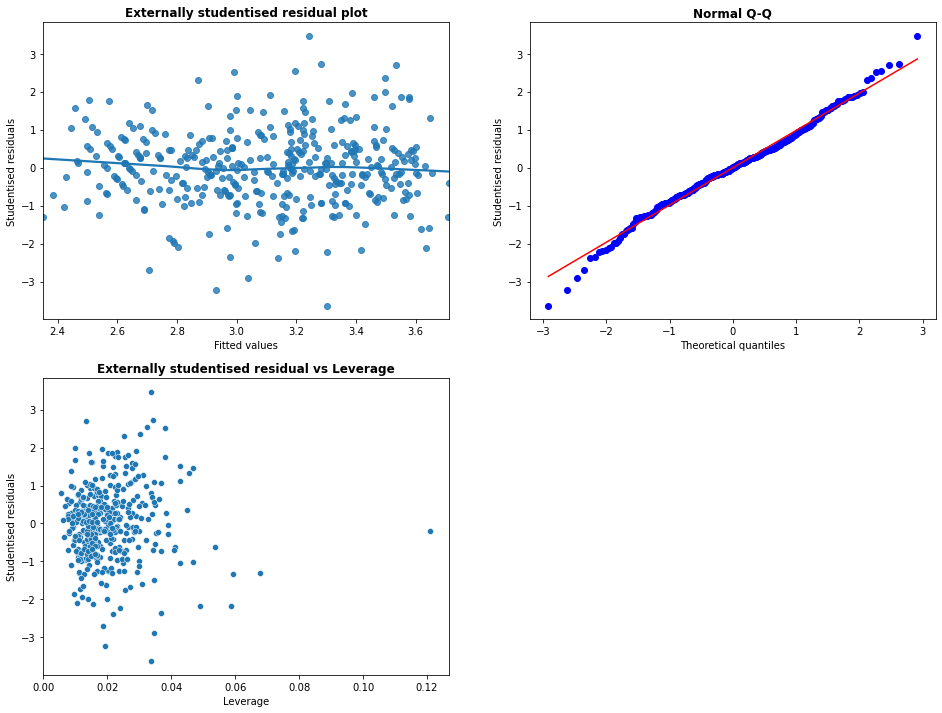

In [12]:
X = data[['cylinders','displacement','horsepower','weight','acceleration','year','origin']]
y = data[['mpg']]

y= np.log(y)
##y = np.sqrt(y)
##y = y**2

X= np.log(X)
##X = np.sqrt(X)
##X= X**2

X = sm.add_constant(X)
X.rename(columns={'const':'Intercept'},inplace = True)     

model = sm.OLS(y,X).fit()
print(model.summary())

y_pred = np.array(model.predict(X)).reshape(-1,1)
lm_plot(lm_stats(X, y, y_pred))  
